In [8]:
from typing import TypedDict

class PortfolioState(TypedDict):
    amount_usd: float
    total_usd: float
    total_inr: float


In [9]:
def calculate_portfolio_value(state: PortfolioState) -> float:
    state["total_usd"]  = state["amount_usd"] * 40
    return state;

def calculate_portfolio_inr(state: PortfolioState) -> float:
    state['total_inr'] = state['total_usd'] * 85
    return state;



In [10]:
from langgraph.graph import StateGraph, START, END

builder = StateGraph(PortfolioState)

builder.add_node("calculate_portfolio_value", calculate_portfolio_value)
builder.add_node("calculate_portfolio_inr", calculate_portfolio_inr)

builder.add_edge(START, "calculate_portfolio_value")
builder.add_edge("calculate_portfolio_value", "calculate_portfolio_inr")
builder.add_edge("calculate_portfolio_inr", END)

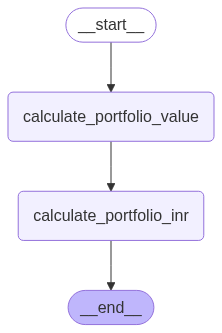

{'amount_usd': 1000, 'total_usd': 40000, 'total_inr': 3400000}

In [11]:
graph = builder.compile()

from IPython.display import Image, display

display(Image(graph.get_graph().draw_mermaid_png()))

graph.invoke({"amount_usd": 1000})